# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1


<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>





**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**b.** Use the cell below to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [5]:
df.user_id.nunique()

290584

**d.** The proportion of users converted.

In [6]:
df.converted.mean()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [7]:
df[(df['group'] == 'treatment') & ~(df['landing_page'] == 'new_page')].shape[0] + df[(df['group'] == 'control') & ~(df['landing_page'] == 'old_page')].shape[0]

3893

In [8]:
df.query('group == "treatment" and landing_page != "new_page"').head()

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0


**f.** Do any of the rows have missing values?

In [9]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  




Store your new dataframe in **df2**.

In [10]:
list_to_drop_1 = list(df[(df['group'] == 'treatment') & ~(df['landing_page'] == 'new_page')].index)


In [11]:
list_to_drop_2 = list(df[(df['group'] == 'control') & ~(df['landing_page'] == 'old_page')].index)


In [12]:
final_index_drop = list_to_drop_1 + list_to_drop_2
len(final_index_drop)

3893

In [13]:
df2 = df.drop(final_index_drop)

In [14]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  


**a.** How many unique **user_id**s are in **df2**?

In [15]:
df2.shape[0]

290585

In [16]:
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [17]:
duplicate = list(df2[df2.user_id.duplicated()].user_id)[0]
duplicate

773192

**c.** Display the rows for the duplicate **user_id**? 

In [18]:
display_dup = df2[df2['user_id'] == duplicate]
display_dup

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [19]:
df2 = df2.drop(display_dup.index[0])
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [20]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted


### ToDo 1.4  

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>





In [21]:
p_population = df2.converted.mean()
p_population

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
conversion_rate_control = df2.query('group == "control" and converted == 1').shape[0] / df2.query('group == "control"').shape[0]
conversion_rate_control

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
conversion_rate_treatment = df2.query('group == "treatment" and converted == 1').shape[0] / df2.query('group == "treatment"').shape[0]
conversion_rate_treatment

0.11880806551510564

In [24]:
obs_diff = df2['converted'][df2['group'] == 'treatment'].mean() - df2['converted'][df2['group'] == 'control'].mean()
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [25]:
p_new_page = df2.query('landing_page == "new_page"').shape[0] / df2.shape[0]
p_new_page

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

> as it is seen from parts (b), part (c), and (d), the probability of an individual in the control group to convert, 0.1204, is greater than the probability of an individual in the treatment group, 0.1188, to convert by about 0.0015, and the probability of an individual recieving a new page is approximately 0.5 (the half of the set which compose of only two outputs). So, treatment group did not show to leadd to more conversions initially. 

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  


You can state your hypothesis in terms of words or in terms of **$ p_{old}$** and **$ p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

$$ H_0: p_{new} - p_{old} \leq 0$$
$$ H_1: p_{new} - p_{old} > 0$$

### ToDo 2.2 - Null Hypothesis $ H_0$ Testing
Under the null hypothesis $ H_0$, assume that $ p_{new}$ and $ p_{old}$ are equal. Furthermore, assume that $ p_{new}$ and $ p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$ p_{new}$ = $ p_{old}$ = $ p_{population}$
</center>

In this section, I will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $ p_{new}$ under the null hypothesis? 

In [26]:
P_new_h_0 = p_population
P_new_h_0

0.11959708724499628

**b.** What is the **conversion rate** for $ p_{old}$ under the null hypothesis? 

In [27]:
P_old_h_0 = p_population
P_old_h_0

0.11959708724499628

**c.** What is $ n_{new}$, the number of individuals in the treatment group? <br><br>


In [28]:
n_new = df2[(df2['group'] == 'treatment')].shape[0]
n_new

145310

**d.** What is $ n_{old}$, the number of individuals in the control group?

In [29]:
n_old = df2[(df2['group'] == 'control')].shape[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $ n_{new}$ transactions with a conversion rate of $ p_{new}$ under the null hypothesis.  <br><br>


In [30]:
new_page_converted = np.random.choice([1,0], size=n_new, p=[P_new_h_0, 1-P_new_h_0])
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
p_sample_new_h_0 = new_page_converted.mean()
p_sample_new_h_0

0.12063863464317666

**f. Simulate Sample for the `control` Group** <br>
Simulate $ n_{old}$ transactions with a conversion rate of $ p_{old} $ under the null hypothesis. <br> Store these $ n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [32]:
old_page_converted = np.random.choice([1,0], size=n_old, p=[P_old_h_0, 1-P_old_h_0])
old_page_converted

array([1, 1, 0, ..., 0, 0, 0])

In [33]:
p_sample_old_h_0 = old_page_converted.mean()
p_sample_old_h_0

0.11977366906672908

**g.** Find the difference in the "converted" probability $ (p{'}_{new}$ - $p{'}_{old}) $ for your simulated samples from the parts (e) and (f) above. 

In [34]:
p_sample_new_h_0 - p_sample_old_h_0

0.00086496557644757943


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $ (p{'}_{new}$ - $p{'}_{old}) $ value 10,000 times using the same simulation process I used in parts (a) through (g) above. 

<br>
Store all  $ (p{'}_{new}$ - $p{'}_{old}) $  values in a NumPy array called `p_diffs`.

In [35]:
# Sampling distribution 
p_diffs = []
for _ in range(10000):
    sample_new_page_converted = np.random.choice([1,0], size=n_new, p=[P_new_h_0, 1-P_new_h_0])
    sample_p_sample_new_h_0 = sample_new_page_converted.mean()
    sample_old_page_converted = np.random.choice([1,0], size=n_old, p=[P_old_h_0, 1-P_old_h_0])
    sample_p_sample_old_h_0 = sample_old_page_converted.mean()
    sample_diff = sample_p_sample_new_h_0 - sample_p_sample_old_h_0
    p_diffs.append(sample_diff)


In [36]:
p_diffs = np.array(p_diffs)
p_diffs

array([ 0.00149144, -0.00080053,  0.00063109, ..., -0.00086239,
        0.00068609, -0.00137869])

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  



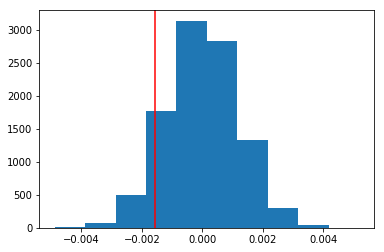

In [37]:
plt.hist(p_diffs)
plt.axvline(obs_diff, color = 'r');

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [38]:
p_value = (p_diffs > obs_diff).mean()
p_value

0.90680000000000005

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? 

>it is the p-value, which is the probability of observing your data or more extreme data, if the null is true. 

>the value of the P-value is greater than the threshold of 0.05, as it is 0.906, so it is statistically significant because we fail to reject the null hypothesis of that $ H_0: p_{new} - p_{old} \leq 0$ or we may produce a type I error.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [39]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [40]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2[(df2['landing_page'] == 'old_page') & (df2['converted'] == 1)].shape[0]

# number of conversions with the new_page
convert_new = df2[(df2['landing_page'] == 'new_page') & (df2['converted'] == 1)].shape[0]

# number of individuals who were shown the old_page
n_old = df2[(df2['landing_page'] == 'old_page')].shape[0]

# number of individuals who received new_page
n_new = df2[(df2['landing_page'] == 'new_page')].shape[0]

print(f"old converts is {convert_old}, new converts is {convert_new}\nold page set is {n_old}, new page set is {n_new} ")

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


old converts is 17489, new converts is 17264
old page set is 145274, new page set is 145310 


In [41]:
count_array = np.array([convert_new, convert_old])
nobs_array = np.array([n_new, n_old])

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $ (p{'}_{new}-p{'}_{old}) $  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
 Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $ Z_{score}$ and $ Z_{\alpha}$. 

In other words, we determine whether or not the $ Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $ Z_{score}$ lies in that region.



In [42]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest(count_array, nobs_array, alternative='larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>



>the value of the z-score is -1.3109 which is less than the on-tailed $ Z_{\alpha}$, which is 1.645, so it is $ Z_{score}$ < $Z_{\alpha}$; thus we fail to reject the right-tailed hypothesis $ H_0$.

> the p-value is vey similar, agrees with the findings in parts (j) and (k), to the sampling distribution that was done earlier, and that confirms the results produced.

>these results confirm and agrees with the conversion rates in the population of the control group is greater than the treatment group.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 


**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>logestic regression

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [43]:
df2['intersept'] = 1

In [44]:
ab_page = pd.get_dummies(df2.group)['treatment']
df2['ab_page'] = ab_page
df2.head()

,user_id,timestamp,group,landing_page,converted,intersept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [45]:
x = df2[['intersept','ab_page']]
y = df2['converted']
log_mod = sm.Logit(y,x)
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [46]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-09-26 10:57 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intersept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  



>the p-value for the ab_page is 0.1899	and it is different from the one in the A/B test section because the null and alternative hypotheses assiciated with the A/B section, which is $$H_0: p_{new} - p_{old} \leq 0$$
$$H_1: p_{new} - p_{old} > 0$$, is different from the hypotheses assiciated with the regression section, which is $$H_0: slope_{population} = 0$$ $$H_1:slope_{population}  ≠ 0$$

>besides the hypotheses assiciated with the A/B section were one-tailed (one sided), but in the regression section it is two-tailed (two sided)

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>it is good to add more variables to the regression model as the time stamp. As we could see which period of time is assiciated with more converts, and we could use them catagorically as day, morning, evening ...etc; however, this will rise couple of issues: 1- it will make the results interpetation be harder, 2- it may lead to Multicollinearity if one or more variable are corelated to each other.  

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 


1. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 


 Provide the statistical output as well as a written response to answer this question.

In [47]:
df3 = pd.read_csv('countries.csv')
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [48]:
df_merged = df2.merge(df3, on ='user_id', how='left')
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intersept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [49]:
df_merged[['CA','UK','US']] = pd.get_dummies(df_merged.country)
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intersept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 


In [50]:
x = df_merged[['intersept','ab_page','UK','US']]
y = df_merged['converted']
log_mod = sm.Logit(y,x)
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-09-26 10:57 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intersept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

In [51]:
np.exp(results.params)

intersept    0.131332
ab_page      0.985168
UK           1.051944
US           1.041599
dtype: float64

In [52]:
1/0.985168

1.0150553002127556

>*interpreting results:*

>For every 100% decrease in new_page, convert will be about 1.5% more likely to happen, holding all other varible constant.

>For every 100% increase in UK, convert is 5.2% more likely to happen, holding all other varible constant.

>For every 100% increase in US, convert is 4.2% more likely to happen, holding all other varible constant.

>under these results we fail to reject the null hypothesis and the p-value of the intersept is the most statistically significant factor in dertermining the converts rate.


In [53]:
df_merged['UK_ab_page'] = df_merged['UK']*df_merged['ab_page']
df_merged['US_ab_page'] = df_merged['US']*df_merged['ab_page']
x = df_merged[['intersept', 'ab_page', 'UK', 'US', 'UK_ab_page', 'US_ab_page']]
y = df_merged['converted']
logit3 = sm.Logit(y,x)

results = logit3.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-09-26 11:02 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intersept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
US_ab_page     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

In [54]:
np.exp(results.params)

intersept     0.134794
ab_page       0.934776
UK            1.011854
US            1.017682
UK_ab_page    1.081428
US_ab_page    1.048001
dtype: float64

In [56]:
1/0.934776

1.069775004920965

>*interpreting results:*

> only intercept's p-value is less than 0.05, which is statistically significant. Other varable in the summary are not statistically significant.

>So, the country a user lives is not significant for the converted rate considering the page.

>Convert is about 8.1% more likely to happen for UK and new page users more than CA, holding all other varible constant.

>Convert is about 4.8% more likely to happen for US and new page users more than CA, holding all other varible constant.

>Convert is about 6.9% more likely to happen for every 100% decrease in the new page, holding all other varible constant.